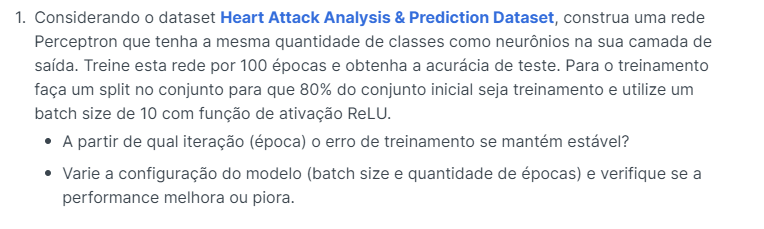

In [ ]:
#definindo o conjunto de treinamento e de testes
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('/content/heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X = data.drop('output', axis = 1)
Y = data['output']

print("Conjunto de dados:", X.shape)
print("Conjunto de rótulos:", Y.shape)
print("Rótulos existentes:", np.unique(Y))

Conjunto de dados: (303, 13)
Conjunto de rótulos: (303,)
Rótulos existentes: [0 1]


In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, shuffle=True)

print("Conjunto de treinamento:", xTrain.shape)
print("Conjunto de teste:", xTest.shape)
print("Rótulos de treinamento:", np.unique(yTrain))
print("Rótulos de teste:", np.unique(yTest))

Conjunto de treinamento: (242, 13)
Conjunto de teste: (61, 13)
Rótulos de treinamento: [0 1]
Rótulos de teste: [0 1]


In [ ]:
# criando o modelo Perceptron
from tensorflow import keras

model1 = keras.Sequential(
    [
        #camada densa indica neurônios totalmente conectados (quantidade, ativação, formato da entrada)
        keras.layers.Dense(xTrain.shape[1], activation="relu", input_shape=(xTrain.shape[1],)),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)

# a primeira camada possui 930 parâmetros: 900 referentes a w (30 atributos e 30 pesos) e 30 referentes ao bias
# a segunda camada possui 31 parâmetros : 30 referentes a w e 1 referente ao bias
model1.summary()

#definindo as métricas de avaliação e treinando o modelo
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp")
]

model1.compile(loss="binary_crossentropy", metrics=metrics)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 1)                 14        
                                                                 
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1 = model1.fit(xTrain, yTrain, batch_size=10, epochs=100, verbose=False)

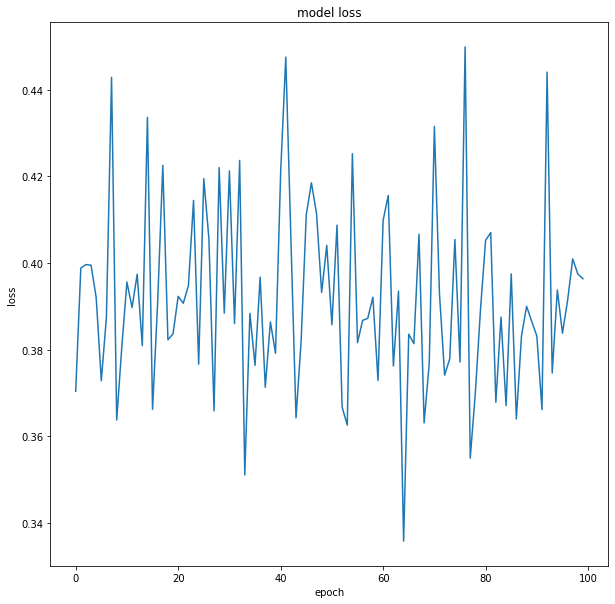

In [ ]:
# visualizando a convergência da rede durante o treinamento
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(history1.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

In [ ]:
# avaliando a predição do modelo com o conjunto de testes
score = model1.evaluate(xTest, yTest)
print(model1.metrics_names)
print("Falsos negativos: ", score[1])
print("Falsos positivos: ", score[2])
print("Verdadeiros negativos: ", score[3])
print("Verdadeiros positivos: ", score[4])

acuracia = (score[3]+score[4])/(score[1]+score[2]+score[3]+score[4])
print("Acurácia: ", acuracia)

2/2 [==============================] - 1s 9ms/step - loss: 0.7405 - fn: 20.0000 - fp: 1.0000 - tn: 26.0000 - tp: 14.0000
['loss', 'fn', 'fp', 'tn', 'tp']
Falsos negativos:  20.0
Falsos positivos:  1.0
Verdadeiros negativos:  26.0
Verdadeiros positivos:  14.0
Acurácia:  0.6557377049180327


### A partir de qual iteração (época) o erro de treinamento se mantém estável?
O erro começa a se manter estável entre as épocas 10 e 15

### Varie a configuração do modelo (batch size e quantidade de épocas) e verifique se a performance melhora ou piora.





batch_size=15, epochs=200
Não há mudanças aparentes, em relação ao testado anteriormente

batch_size=30, epochs=100
O modelo se torna estável após a epoca 30

batch_size=60, epochs=100
O modelo se torna instável, a loss ainda é >1 na época 98. Variação de loss após certo ponto.

batch_size=200, epochs=100
O modelo não atinge a estabilidade, porém, não há variação de loss, apenas uma queda contínua.

batch_size=200, epochs=1000
O modelo mostra variação na loss

In [ ]:
# criando o modelo Perceptron
from tensorflow import keras

model2 = keras.Sequential(
    [
        #camada densa indica neurônios totalmente conectados (quantidade, ativação, formato da entrada)
        keras.layers.Dense(xTrain.shape[1], activation="relu", input_shape=(xTrain.shape[1],)),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)

# a primeira camada possui 930 parâmetros: 900 referentes a w (30 atributos e 30 pesos) e 30 referentes ao bias
# a segunda camada possui 31 parâmetros : 30 referentes a w e 1 referente ao bias
model2.summary()

#definindo as métricas de avaliação e treinando o modelo
metrics2 = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp")
]

model2.compile(loss="binary_crossentropy", metrics=metrics2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 13)                182       
                                                                 
 dense_3 (Dense)             (None, 1)                 14        
                                                                 
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = model2.fit(xTrain, yTrain, batch_size=10, epochs=100, verbose=False)

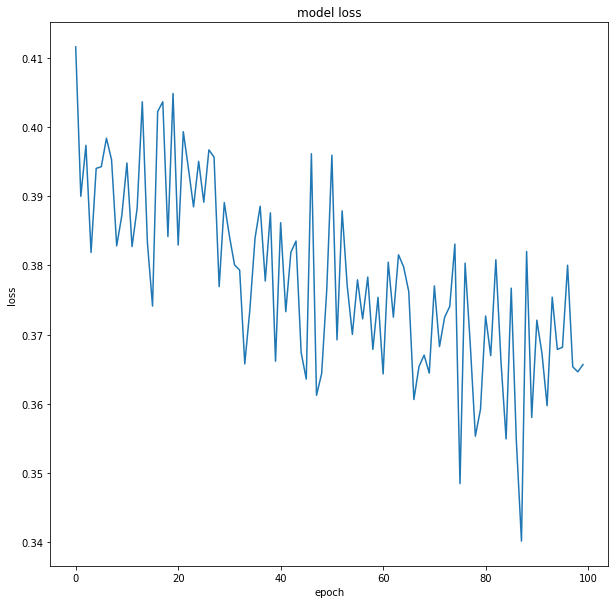

In [ ]:
# visualizando a convergência da rede durante o treinamento
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(history2.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

In [ ]:
# avaliando a predição do modelo com o conjunto de testes
score = model2.evaluate(xTest, yTest)
print(model2.metrics_names)
print("Falsos negativos: ", score[1])
print("Falsos positivos: ", score[2])
print("Verdadeiros negativos: ", score[3])
print("Verdadeiros positivos: ", score[4])

acuracia = (score[3]+score[4])/(score[1]+score[2]+score[3]+score[4])
print("Acurácia: ", acuracia)

2/2 [==============================] - 1s 12ms/step - loss: 0.5184 - fn: 2.0000 - fp: 15.0000 - tn: 12.0000 - tp: 32.0000
['loss', 'fn', 'fp', 'tn', 'tp']
Falsos negativos:  2.0
Falsos positivos:  15.0
Verdadeiros negativos:  12.0
Verdadeiros positivos:  32.0
Acurácia:  0.7213114754098361
